In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
info_database = pd.read_csv("cards_database.csv",index_col="Id")

In [6]:
info_database.head(5)

,Name,Desc,Type,Race,Archetype,Attribute,Atk,Def,Level,Price
Id,,,,,,,,,,
34541863,"""A"" Cell Breeding Device","During each of your Standby Phases, put 1 A-Co...",Spell Card,Continuous,Alien,NaN,NaN,NaN,NaN,0.24
64163367,"""A"" Cell Incubator",Each time an A-Counter(s) is removed from play...,Spell Card,Continuous,Alien,NaN,NaN,NaN,NaN,0.21
91231901,"""A"" Cell Recombination Device",Target 1 face-up monster on the field; send 1 ...,Spell Card,Quick-Play,Alien,NaN,NaN,NaN,NaN,0.14
73262676,"""A"" Cell Scatter Burst","Select 1 face-up ""Alien"" monster you control. ...",Spell Card,Quick-Play,Alien,NaN,NaN,NaN,NaN,0.20
37478723,"""Infernoble Arms - Durendal""",While this card is equipped to a monster: You ...,Spell Card,Equip,Noble Knight,NaN,NaN,NaN,NaN,10.74


In [11]:
info_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11474 entries, 34541863 to 76080032
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       11474 non-null  object 
 1   Desc       11454 non-null  object 
 2   Type       11474 non-null  object 
 3   Race       11474 non-null  object 
 4   Archetype  6418 non-null   object 
 5   Attribute  7557 non-null   object 
 6   Atk        7557 non-null   float64
 7   Def        7218 non-null   float64
 8   Level      7218 non-null   float64
 9   Price      11474 non-null  float64
dtypes: float64(4), object(6)
memory usage: 986.0+ KB


In [72]:
info_database.describe()

,Atk,Def,Level,Price
count,7557.000000,7218.000000,7218.000000,11474.000000
mean,1465.396321,1227.917706,4.508451,1.571110
std,937.353026,852.870464,2.348646,17.474039
min,0.000000,0.000000,0.000000,0.000000
25%,800.000000,500.000000,3.000000,0.140000
50%,1500.000000,1200.000000,4.000000,0.220000
75%,2100.000000,1800.000000,6.000000,0.550000
max,5000.000000,5000.000000,13.000000,999.990000


In [24]:
#All possible types
print(set(info_database["Type"]))

{'Skill Card', 'Fusion Monster', 'Ritual Effect Monster', 'Spell Card', 'Pendulum Effect Monster', 'Synchro Pendulum Effect Monster', 'Normal Tuner Monster', 'Tuner Monster', 'Trap Card', 'XYZ Monster', 'Gemini Monster', 'Flip Effect Monster', 'Synchro Monster', 'Pendulum Effect Fusion Monster', 'Pendulum Normal Monster', 'Normal Monster', 'Union Effect Monster', 'Effect Monster', 'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster', 'Spirit Monster', 'Synchro Tuner Monster', 'Token', 'Link Monster', 'Toon Monster', 'Pendulum Flip Effect Monster', 'Ritual Monster'}


In [25]:
#All possible Races
print(set(info_database["Race"]))

{'Beast', 'Mako', 'Yami Yugi', 'Emma', 'David', 'Sea Serpent', 'Cyberse', 'Yami Bakura', 'Divine-Beast', 'Creator-God', 'Rock', 'Thunder', 'Fish', 'Wyrm', 'Ritual', 'Reptile', 'Seto Kaiba', 'Normal', 'Pyro', 'Keith', 'Joey', 'Joey Wheeler', 'Mai Valentine', 'Quick-Play', 'Insect', 'Dinosaur', 'Plant', 'Spellcaster', 'Machine', 'Continuous', 'Counter', 'Kaiba', 'Warrior', 'Rex', 'Psychic', 'Equip', 'Tea Gardner', 'Lumis Umbra', 'Arkana', 'Fairy', 'Aqua', 'Winged Beast', 'Mai', 'Yami Marik', 'Christine', 'Pegasus', 'Fiend', 'Field', 'Andrew', 'Weevil', 'Ishizu', 'Bonz', 'Dragon', 'Odion', 'Espa Roba', 'Beast-Warrior', 'Yugi', 'Ishizu Ishtar', 'Zombie'}


In [27]:
#All possible Attributes
print(set(info_database["Attribute"]))

{nan, 'DARK', 'DIVINE', 'FIRE', 'WIND', 'LIGHT', 'WATER', 'EARTH'}


In [65]:
sns.set_style("darkgrid")

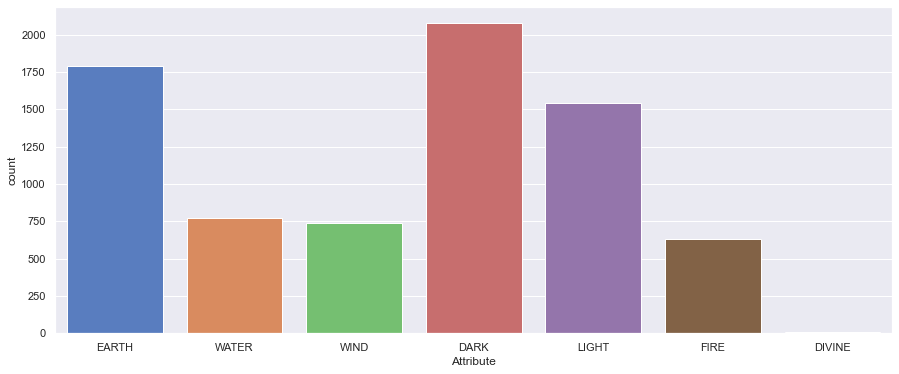

In [66]:
#Show types distribution
fig, ax = plt.subplots(figsize=(15,6))
sns.set_palette(sns.color_palette("muted"))
sns.countplot(data=info_database, x="Attribute",ax=ax)

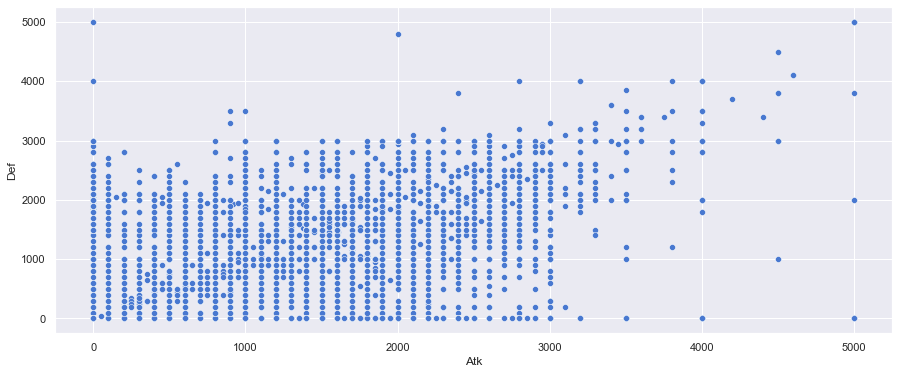

In [71]:
#Show types distribution
fig, ax = plt.subplots(figsize=(15,6))
sns.set_palette(sns.color_palette("muted"))
sns.scatterplot(data=info_database, x="Atk", y="Def", ax=ax)

In [82]:
#Split types into monster and spell cards (Discarded tokens)
monster_type_names = [x for x in set(info_database["Type"]) if "Monster" in x]
print(monster_type_names)
spell_type_names = (set(info_database["Type"]) - set(monster_type_names)) - set(['Token'])
print(spell_type_names)

['Fusion Monster', 'Ritual Effect Monster', 'Pendulum Effect Monster', 'Synchro Pendulum Effect Monster', 'Normal Tuner Monster', 'Tuner Monster', 'XYZ Monster', 'Gemini Monster', 'Flip Effect Monster', 'Synchro Monster', 'Pendulum Effect Fusion Monster', 'Pendulum Normal Monster', 'Normal Monster', 'Union Effect Monster', 'Effect Monster', 'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster', 'Spirit Monster', 'Synchro Tuner Monster', 'Link Monster', 'Toon Monster', 'Pendulum Flip Effect Monster', 'Ritual Monster']
{'Skill Card', 'Spell Card', 'Trap Card'}


In [96]:
#How many monsters
info_database[info_database["Type"].isin(monster_type_names)]["Name"].count()

7450

In [98]:
info_database["AtkDefCombined"] = info_database["Atk"] + info_database["Def"]

In [101]:
#Show 10 most powerfull monsters based on atk + def
info_database.sort_values(by="AtkDefCombined",ascending=False).head(10)

,Name,Desc,Type,Race,Archetype,Attribute,Atk,Def,Level,Price,AtkDefCombined
Id,,,,,,,,,,,
52085072,Dystopia the Despondent,Cannot be Normal Summoned/Set. Must be Special...,Effect Monster,Fiend,NaN,DARK,5000.0,5000.0,12.0,0.66,10000.0
99267150,Five-Headed Dragon,5 Dragon monsters\r\nMust be Fusion Summoned. ...,Fusion Monster,Dragon,NaN,DARK,5000.0,5000.0,12.0,1.03,10000.0
37115575,Malefic Truth Dragon,Cannot be Normal Summoned/Set. Must be Special...,Effect Monster,Dragon,Malefic,DARK,5000.0,5000.0,12.0,0.46,10000.0
62873545,Dragon Master Knight,"""Black Luster Soldier"" + ""Blue-Eyes Ultimate D...",Fusion Monster,Dragon,Blue-Eyes,LIGHT,5000.0,5000.0,12.0,0.96,10000.0
84433295,Quintet Magician,5 Spellcaster monsters\r\nMust be Fusion Summo...,Fusion Monster,Spellcaster,NaN,DARK,4500.0,4500.0,12.0,10.89,9000.0
47027714,T.G. Halberd Cannon/Assault Mode,Cannot be Normal Summoned/Set. Must be Special...,Effect Monster,Machine,Assault Mode,EARTH,4500.0,4500.0,12.0,0.14,9000.0
37542782,Cyberdark End Dragon,"""Cyberdark Dragon"" + ""Cyber End Dragon""\r\nMus...",Fusion Monster,Machine,Cyberdark,DARK,5000.0,3800.0,12.0,0.00,8800.0
46033517,Machina Ruinforce,Cannot be Normal Summoned/Set. Must be Special...,Effect Monster,Machine,Machina,DARK,4600.0,4100.0,10.0,0.00,8700.0
58054262,Machina Force,Cannot be Normal Summoned/Set. Must be Special...,Effect Monster,Machine,Machina,EARTH,4600.0,4100.0,10.0,0.10,8700.0
